<a href="https://colab.research.google.com/github/jenillunagariya/README.md/blob/main/Case_Study_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Biopython Case Study – STUDENT VERSION
This notebook is designed for beginners with no coding background.
It will guide you step-by-step through gene and protein analysis using Biopython.

**Run this notebook in [Google Colab](https://colab.research.google.com)**.

---

## ✅ Step 1: Install Required Packages
These lines install Biopython and a 3D structure viewer. You only need to run them once per session.

In [1]:
!pip install biopython
!pip install nglview

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 80.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 🧪 Case Study 1: Gene Sequence Analysis
**Goal:** Fetch a gene from NCBI and analyze its base composition (e.g. A, T, G, C)

In [2]:
# Import necessary Biopython modules and plotting tools
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
# Identify yourself to NCBI
Entrez.email = "jenillunagariya1@gmail.com"

In [5]:
# Fetch TP53 gene using its NCBI ID
ncbi_id = "NM_000546"
handle = Entrez.efetch(db="nucleotide", id=ncbi_id, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")

# Display basic info
print("Description:", record.description)
print("Sequence Length:", len(record.seq))
print("First 100 bases:", record.seq[:100])

Description: NM_000546.6 Homo sapiens tumor protein p53 (TP53), transcript variant 1, mRNA
Sequence Length: 2512
First 100 bases: CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACG


### 🔍 What are we looking at?
You're looking at a gene related to cancer (TP53). Now let’s analyze its base composition.

Base counts: Counter({'C': 720, 'T': 639, 'G': 621, 'A': 532})


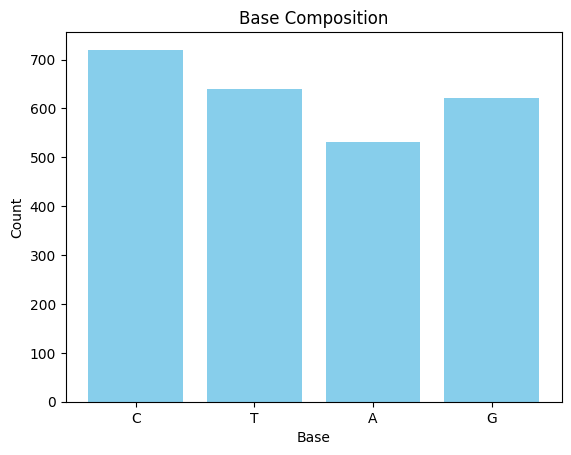

In [6]:
# Count how many A, T, G, C bases are in the gene
base_counts = Counter(record.seq)
print("Base counts:", base_counts)

# Visualize with a bar chart
plt.bar(base_counts.keys(), base_counts.values(), color='skyblue')
plt.title("Base Composition")
plt.xlabel("Base")
plt.ylabel("Count")
plt.show()

In [7]:
# Calculate GC content (stability indicator)
G = base_counts.get("G", 0)
C = base_counts.get("C", 0)
GC_content = (G + C) / len(record.seq) * 100
print("GC Content: {:.2f}%".format(GC_content))

GC Content: 53.38%


💡 **GC Content** is important because genes with high GC may be more stable and harder to denature. This is useful for drug design.